### Quantitative Analysis ###

The attached csv file contains some time series data of the last print every second from 5 banks. They contribute to a data-feed that we subscribe to, generating bid and ask prices for a currency pair. Analyse the data and provide answers to the below questions.

1) What happened here? Talk us through what you see in this data 
2) Which bank had the tightest overall spread across the hour? 
3) Which bank had the most stable spread?
4) Which bank had the most reliable mid-price?
5) If these questions were not an ad-hoc request, what might you have done differently to answer them?

### Import data. 

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt

df = pd.read_csv('data.csv', parse_dates = ['Time'])

### Q1: What happened here? Talk us through what you see in this data

/home/kiril/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


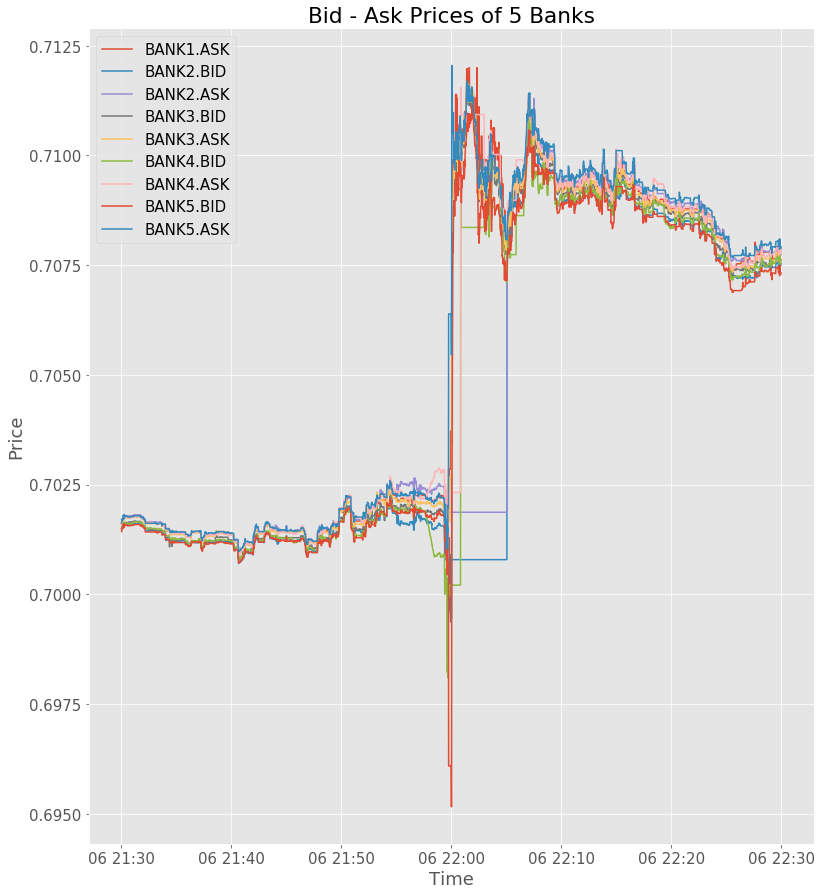

In [2]:
# Data inspection - Descriptive stats 
ds = df.describe()
cols = list(df.columns[1:])
del cols[0]

# Data visualization 
for i in cols:
    
    plt.style.use('ggplot')
    plt.rcParams.update({'font.size': 15})
    plt.rcParams["figure.figsize"] = (13,15)
    plt.title("Bid - Ask Prices of 5 Banks")
    plt.ylabel('Price')
    plt.xlabel('Time')
    plt.plot(df.Time, df[i], label = i )
    plt.legend()

del i 


There is a sharp market move in the bid-ask prices to the upside. This is likely the result of an institutional decision such as a central bank or a release of economic data which surprised the expectations. This creates an arbitrage trading opportunity from 22:00 to 22:05 - Buy from BANK2.ASK and sell at BANK1.BID. 

### Q2: Which bank had the tightest overall spread across the hour? 
###                                     and
### Q3: Which bank had the most stable spread?

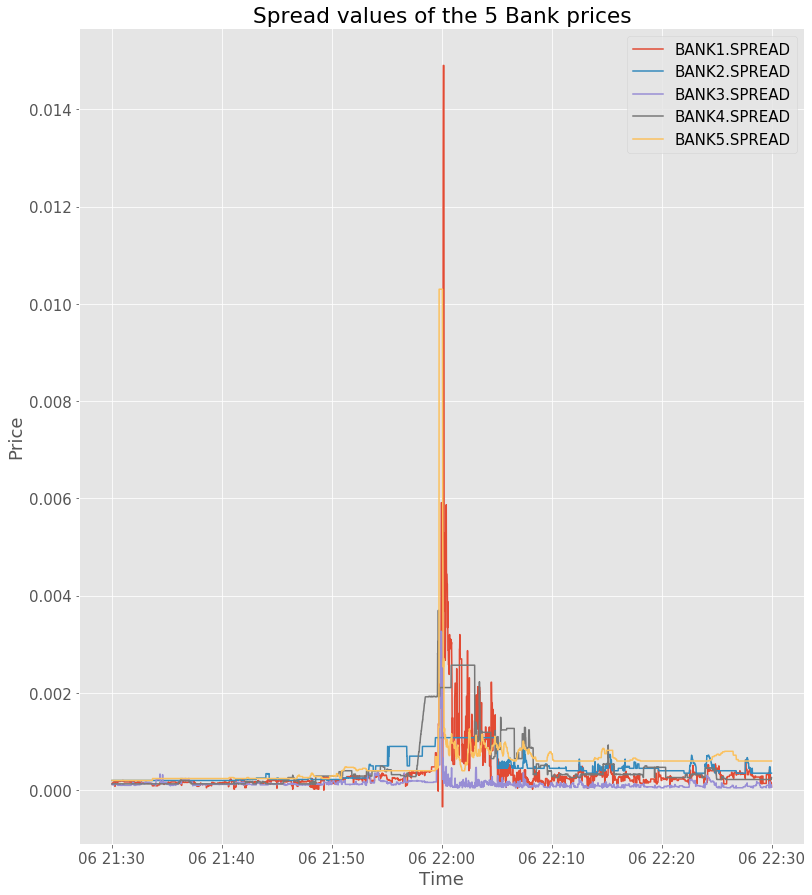

In [3]:
for i in range(1,6):
    df['BANK{}.SPREAD'.format(i)] = df['BANK{}.ASK'.format(i)] - df['BANK{}.BID'.format(i)]

spreads = list(df.columns[11:])

# Plot the spreads 
for i in spreads:
    
    plt.style.use('ggplot')
    plt.rcParams.update({'font.size': 15})
    plt.rcParams["figure.figsize"] = (13,15)
    plt.title("Spread values of the 5 Bank prices")
    plt.ylabel('Price')
    plt.xlabel('Time')
    plt.plot(df.Time, df[i], label = i )
    plt.legend()

del i 

In [4]:
ds = df[spreads].describe()
print(ds)

       BANK1.SPREAD  BANK2.SPREAD  BANK3.SPREAD  BANK4.SPREAD  BANK5.SPREAD
count   3600.000000   3600.000000   3600.000000   3600.000000   3600.000000
mean       0.000381      0.000442      0.000134      0.000493      0.000548
std        0.000765      0.000269      0.000170      0.000588      0.000763
min       -0.000340      0.000200      0.000050      0.000130      0.000200
25%        0.000160      0.000220      0.000090      0.000170      0.000240
50%        0.000220      0.000400      0.000120      0.000290      0.000525
75%        0.000320      0.000500      0.000150      0.000460      0.000600
max        0.014900      0.001080      0.003270      0.003700      0.010300


Q2:
The descriptive statistics of the BANK Spreads show that BANK3 has an average spread of 0.000134 which is considerably smaller compared to the other banks (i.e. BANK1 - 0.000381 etc.). Moreover, the median of BANK3 is the smallest and very close to the average value which suggests that the distribution spread datapoints are centred around the mean thus the distrubution is symmetric. Finally, a visual inspection of the chart  "Spread values of the 5 Bank prices" supports the thesis that BANK3 has the tightest spread (the purple line).

Q3:
Similarly, BANK3 displays the smallest standard deviation of the spread which means that the dispersion of the spread data points is smaller compared to the other banks. Therefore, the spread for BANK3 is the most stable as it does not deviate as much compared to the other spreads. 

### Q4: Which bank had the most reliable mid-price?

In [5]:
# Q4
# Mid price = average of the BID and ASK prices 

for i in range(1,6):
    df['BANK{}.MID_PRICE'.format(i)] = (df['BANK{}.ASK'.format(i)] + df['BANK{}.BID'.format(i)]) / 2 

mid_prices = list(df.columns[16:])

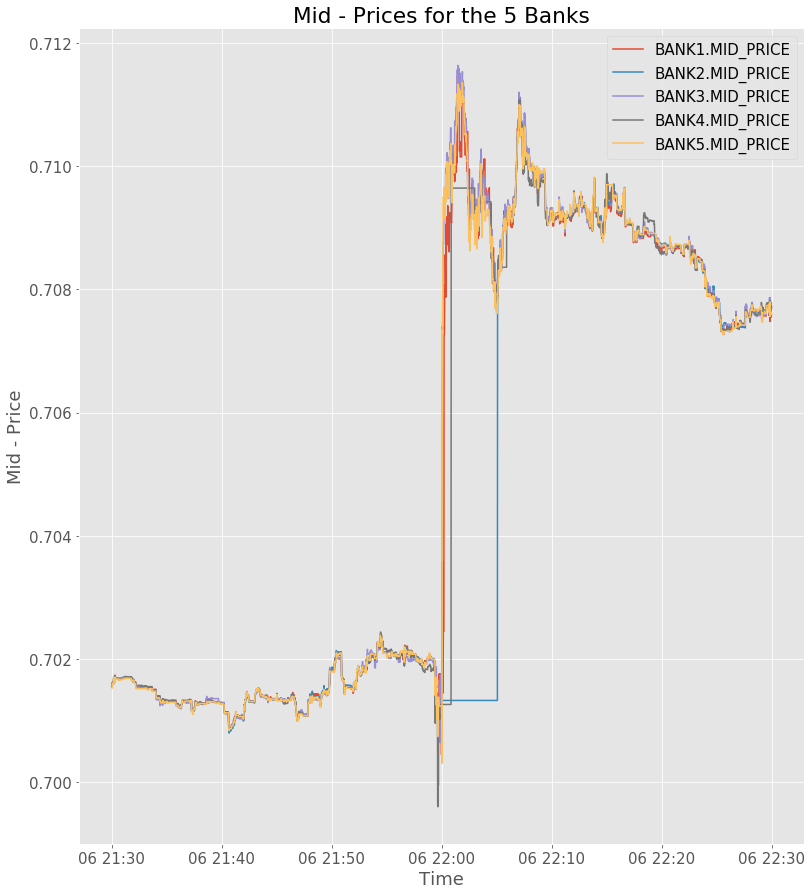

In [6]:
# Plot the mid-prices  
for i in mid_prices:
    
    plt.style.use('ggplot')
    plt.rcParams.update({'font.size': 15})
    plt.rcParams["figure.figsize"] = (13,15)
    plt.title("Mid - Prices for the 5 Banks")
    plt.ylabel('Mid - Price')
    plt.xlabel('Time')
    plt.plot(df.Time, df[i], label = i )
    plt.legend()


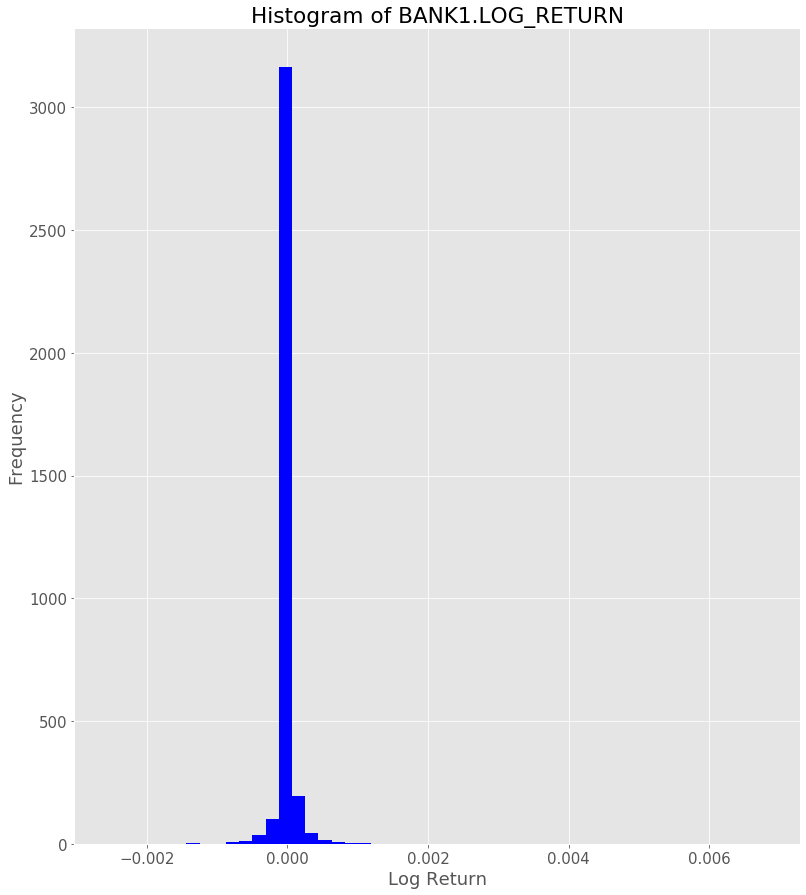

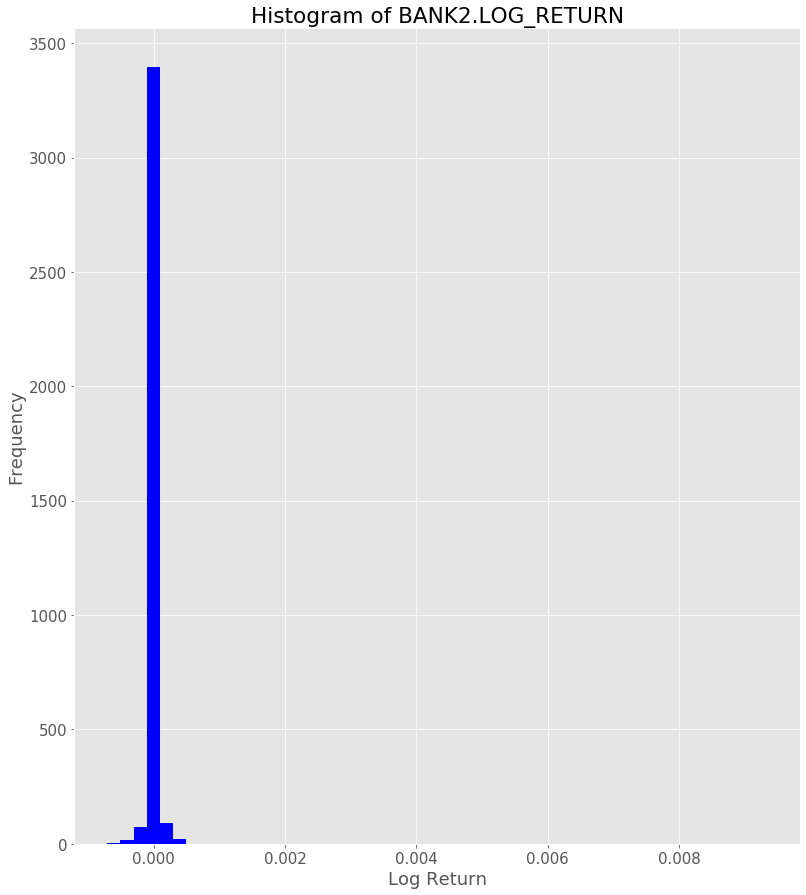

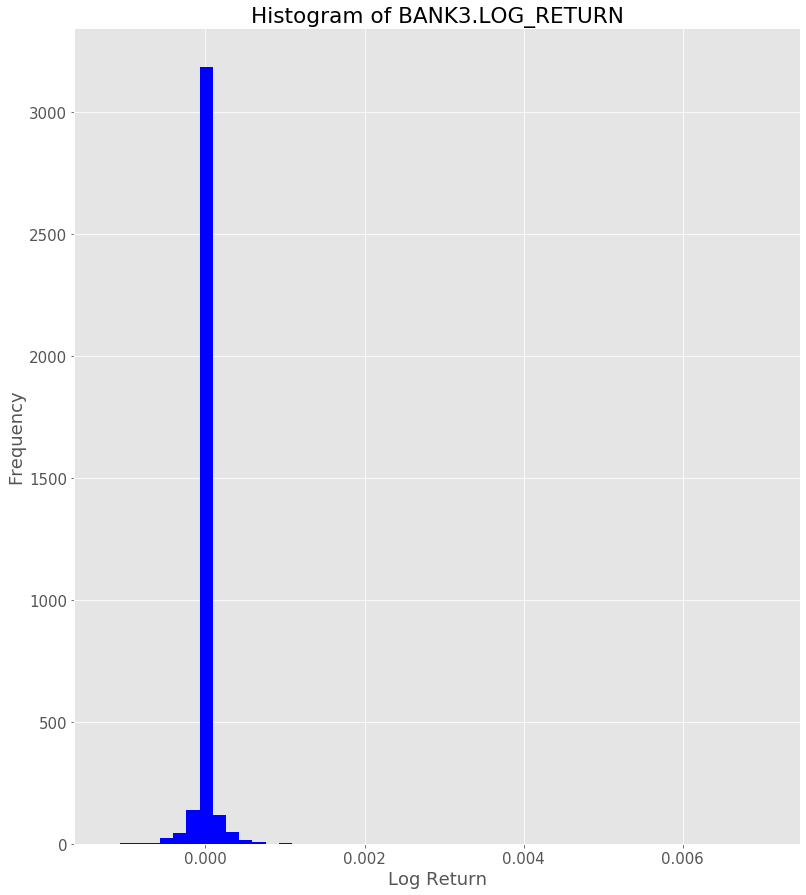

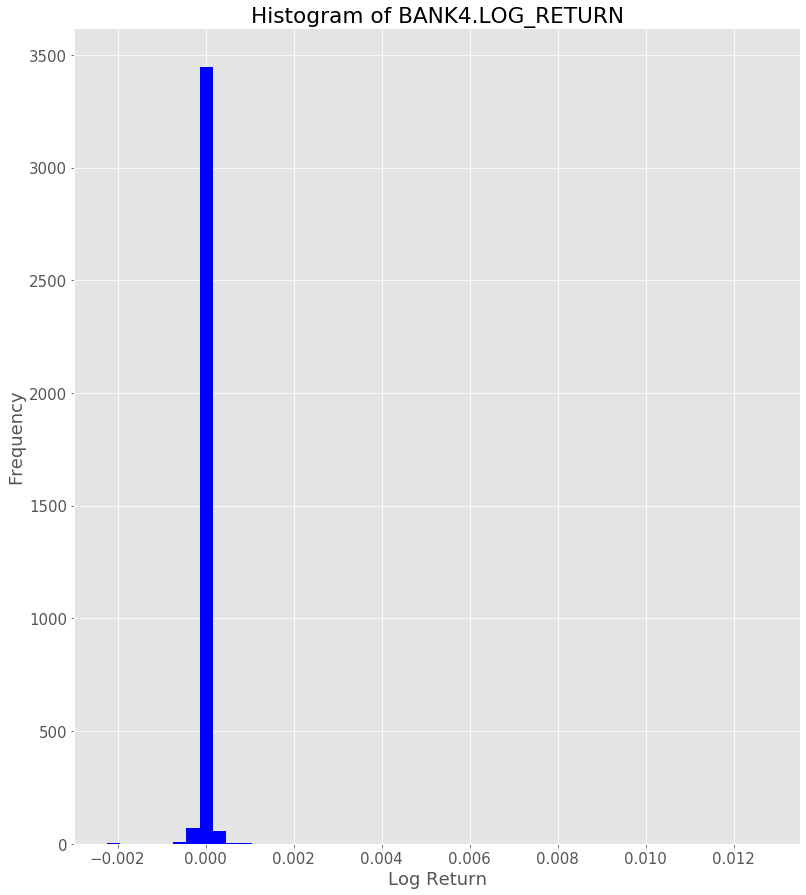

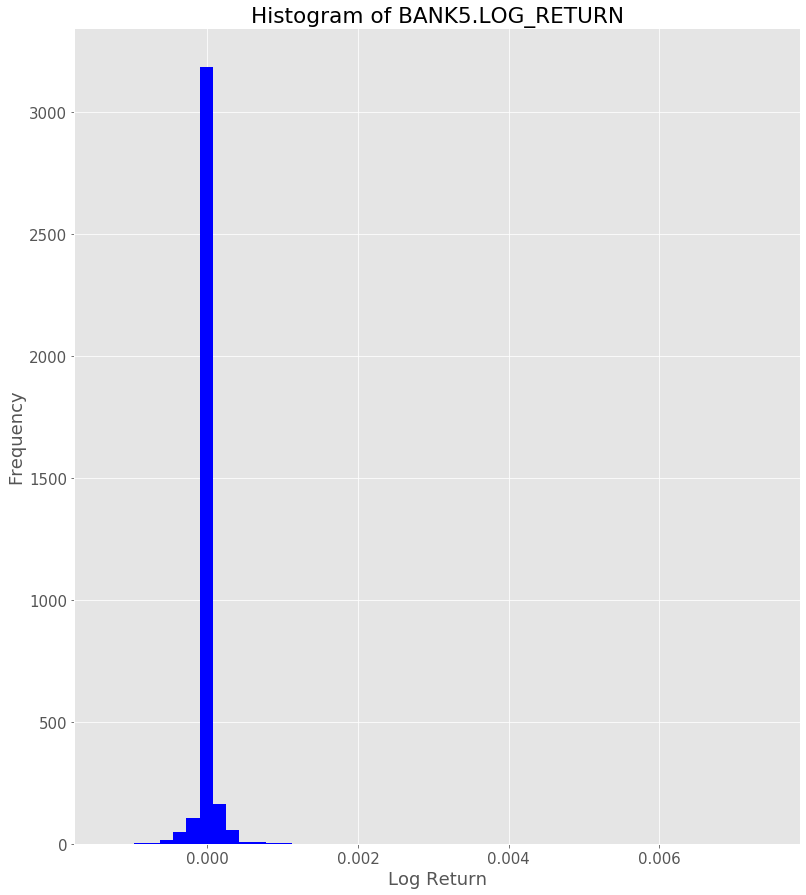

In [7]:

import numpy as np 

for i in range(1,6):
    df['BANK{}.LOG_RETURN'.format(i)] = np.log(df['BANK{}.MID_PRICE'.format(i)].shift(-1) / df['BANK{}.MID_PRICE'.format(i)])
    

rets = list(df.columns[21:])

for i in rets:
    
    plt.title("Histogram of " + i)
    plt.xlabel('Log Return')
    plt.ylabel('Frequency')
    df[i].hist(bins=50, color='b')
    plt.show()
    
    plt.close()

In [8]:
# Skewness and Kurtosis measures

from scipy.stats import kurtosis
from scipy.stats import skew

for i in rets:
    print( i + " SKEW " + str(round(skew(df[i].dropna()),2)))
    print( i + " EXCESS KURTOSIS " + str(round(kurtosis(df[i].dropna()),2)))
    print("-------")
    
del i 


BANK1.LOG_RETURN SKEW 16.35
BANK1.LOG_RETURN EXCESS KURTOSIS 581.01
-------
BANK2.LOG_RETURN SKEW 47.65
BANK2.LOG_RETURN EXCESS KURTOSIS 2644.04
-------
BANK3.LOG_RETURN SKEW 23.92
BANK3.LOG_RETURN EXCESS KURTOSIS 1036.47
-------
BANK4.LOG_RETURN SKEW 43.75
BANK4.LOG_RETURN EXCESS KURTOSIS 2370.44
-------
BANK5.LOG_RETURN SKEW 25.48
BANK5.LOG_RETURN EXCESS KURTOSIS 1134.8
-------


The most reliable mid-price is that of BANK1, at least from a quantitative perspective. The price series is normalized via logarithmic transformation and the distribution of the log returns shows that it follows a pattern similar to the standard normal distribution (see the histograms), which is true also for the other banks. However, BANK1 shows Skewness and Kurtosis closer to the Standard normal distribution where Skew = 0 and Kurtosis = 3 compated to the other banks. These numbers are exceeded by a significant margin by all the banks however, BANK1 shows the smallest deviation from the standard normal metrics, hence any model development using BANK1 mid-prices series should show more reliable results.  


### Q5: If these questions were not an ad-hoc request, what might you have done differently to answer them?

The conducted analysis up to now, represent only an iniatial approach to answering the posed questions. Deeper insight can be obtained by analysing the distirbutions of the respective variables in questions 2 and 3. For example, ploting the distributions via histograms and exploring higher moments of the distributions such as Skewness and Kurtosis can reveal tendencies for extreme outcomes or fat tails which can result in serious deviations of the spread. Moreover, the spread is effectively a prices which means that normalizing the values, for exmple by using log returns rather than prices, can be used to obtain more statistically sound results (similar to the way Q4 is answered).

In relation to question 4, the most reliable prices should be the one which reflects the market most accurately in terms of Suppy/Demand and Market efficiency. Therefore, a more thorough empirical analysis can be performed to analyse how fast the prices reflect the news release thus offering the most reliable price. The currently offered solution is focused primarily on the statistical properties of the prices such as consistency which aims to provide a reassurance that future model development, for example Value at Risk (VaR), will be reliable. In this sense, further work can be done by breaking down the spread into its components such as expected trading volume (which sets a fixed transaction cost by the bank), riskiness of the assets (volatility) and adverse selection (asymmetric information) where a more informed participant can profit by being more informed. The separate components of the spread contribute differently to the size and the behavior of the spread and they should be examined more thoroughly to determine how stable the spread is and how reliable the mid-market price is.   

